### Aim- `To create a machine learning model based on Regression which can predict the prices of houses based on the below dataset.`

### Importing dataset

In [3]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [4]:
house=pd.read_csv("housing.csv")

In [5]:
house

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [6]:
house.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [7]:
house.shape

(20640, 10)

### Data preprocessing 

In [8]:
data=house.copy()


In [9]:
house.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [10]:
data=data.dropna(axis=0,subset="total_bedrooms")

In [11]:
data.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

In [12]:
data.shape

(20433, 10)

In [13]:
data1=data.copy()

In [14]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


In [15]:
data1["ocean_proximity"].value_counts()

<1H OCEAN     9034
INLAND        6496
NEAR OCEAN    2628
NEAR BAY      2270
ISLAND           5
Name: ocean_proximity, dtype: int64

### Exploratory Data Analysis(EDA)

<function print>

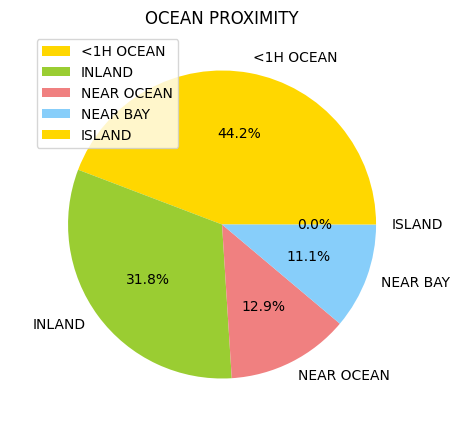

In [16]:
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue']
fig=plt.figure(figsize=(5,5))
data1["ocean_proximity"].value_counts().plot(kind='pie',colors=colors,autopct='%.1f%%')
plt.ylabel(" ")
plt.title("OCEAN PROXIMITY")
plt.legend(loc="upper left")
print

In [17]:
from sklearn.preprocessing import LabelEncoder
label_encoder=LabelEncoder()
data1['new_ocean_proximity']=label_encoder.fit_transform(data['ocean_proximity'])
data1

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,new_ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,3
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,3
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,3
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,3
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,3
...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND,1
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND,1
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND,1
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND,1


In [18]:
data1.drop('ocean_proximity',inplace=True,axis=1)
data1

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,new_ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,3
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,3
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,3
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,3
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,3
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,1
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,1
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,1
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,1


In [19]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   longitude            20433 non-null  float64
 1   latitude             20433 non-null  float64
 2   housing_median_age   20433 non-null  float64
 3   total_rooms          20433 non-null  float64
 4   total_bedrooms       20433 non-null  float64
 5   population           20433 non-null  float64
 6   households           20433 non-null  float64
 7   median_income        20433 non-null  float64
 8   median_house_value   20433 non-null  float64
 9   new_ocean_proximity  20433 non-null  int64  
dtypes: float64(9), int64(1)
memory usage: 1.7 MB


In [20]:
data1.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,new_ocean_proximity
count,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000
mean,-119.570689,35.633221,28.633094,2636.504233,537.870553,1424.946949,499.433465,3.871162,206864.413155,1.166153
std,2.003578,2.136348,12.591805,2185.269567,421.385070,1133.208490,382.299226,1.899291,115435.667099,1.420135
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000,0.000000
25%,-121.800000,33.930000,18.000000,1450.000000,296.000000,787.000000,280.000000,2.563700,119500.000000,0.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.536500,179700.000000,1.000000
75%,-118.010000,37.720000,37.000000,3143.000000,647.000000,1722.000000,604.000000,4.744000,264700.000000,1.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000,4.000000


In [23]:
num_values=['total_rooms','total_bedrooms','median_house_value']
data1[num_values].corr()

,total_rooms,total_bedrooms,median_house_value
total_rooms,1.000000,0.930380,0.133294
total_bedrooms,0.930380,1.000000,0.049686
median_house_value,0.133294,0.049686,1.000000


In [24]:
n_values=['longitude','latitude','median_income','median_house_value']

In [25]:
data1[n_values].corr()

,longitude,latitude,median_income,median_house_value
longitude,1.000000,-0.924616,-0.015550,-0.045398
latitude,-0.924616,1.000000,-0.079626,-0.144638
median_income,-0.015550,-0.079626,1.000000,0.688355
median_house_value,-0.045398,-0.144638,0.688355,1.000000


##    'DATA PREPROCESSING'

In [21]:
inlier_data=data1.copy()

In [22]:
inlier_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,new_ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,3
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,3
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,3
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,3
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,3
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,1
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,1
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,1
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,1


<Axes: ylabel='housing_median_age'>

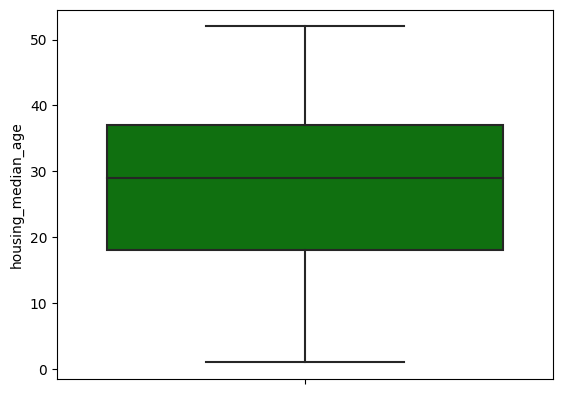

In [29]:
#to check the outliers 
import seaborn as sns
sns.boxplot(y='housing_median_age',data=inlier_data,color="green")

<Axes: xlabel='median_house_value', ylabel='housing_median_age'>

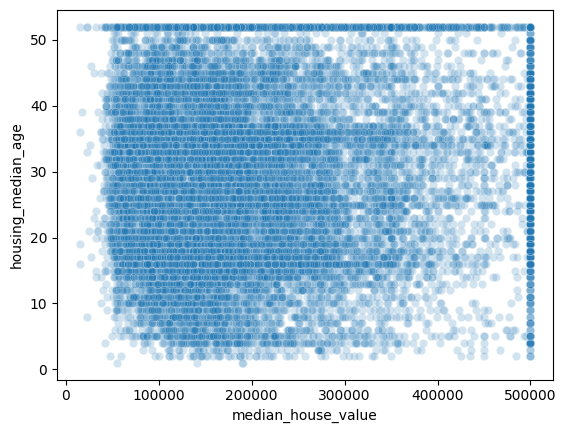

In [30]:
#scatterplot to check the outliers for the housing_median_age with median_house_value
sns.scatterplot(x='median_house_value',y='housing_median_age',data=inlier_data, alpha=0.2)

<Axes: ylabel='total_rooms'>

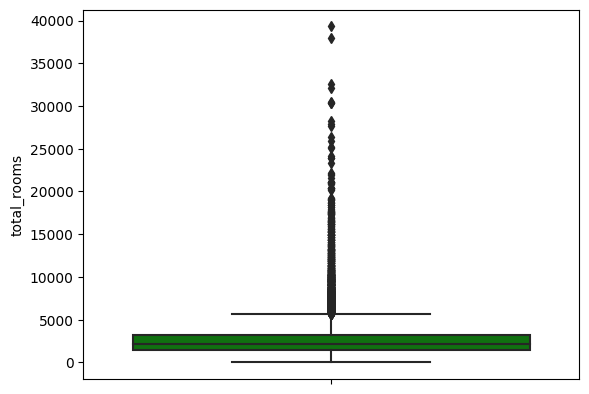

In [32]:
#boxplot for total_rooms to check the outliers
sns.boxplot(y='total_rooms',data=inlier_data, color='green')

<Axes: xlabel='median_house_value', ylabel='total_rooms'>

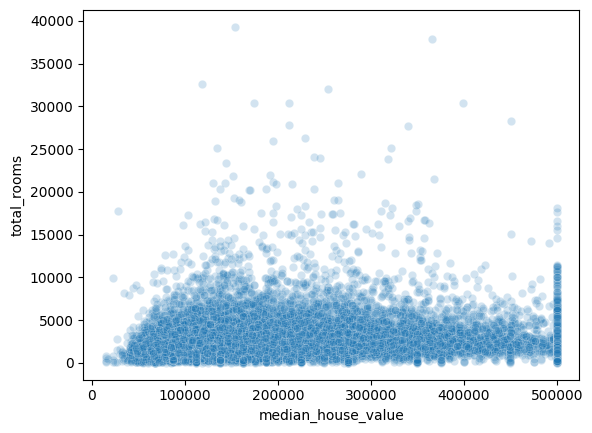

In [33]:
#scatterplot to check the outliers for total_rooms with median_house_value
sns.scatterplot(x = 'median_house_value',y = 'total_rooms',data=inlier_data, alpha=0.2)

       It can be seen from the scatter plot that values higher than 9000 as the outlier.

In [34]:
inlier_data = inlier_data[inlier_data['total_rooms']<9000]

<Axes: ylabel='total_rooms'>

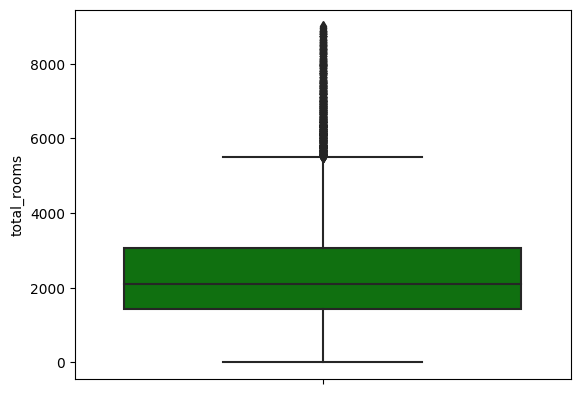

In [35]:
#Boxplot for total_rooms to check the outliers
sns.boxplot(y="total_rooms",data=inlier_data, color='green')

<Axes: xlabel='median_house_value', ylabel='total_rooms'>

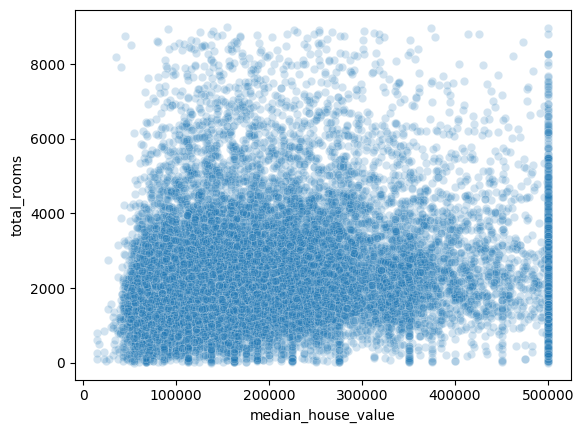

In [38]:
#scatterplot for the total_rooms with median_house_value to detect the outliers
sns.scatterplot(x = 'median_house_value', y='total_rooms',data=inlier_data,alpha=0.2)

<Axes: xlabel='total_bedrooms'>

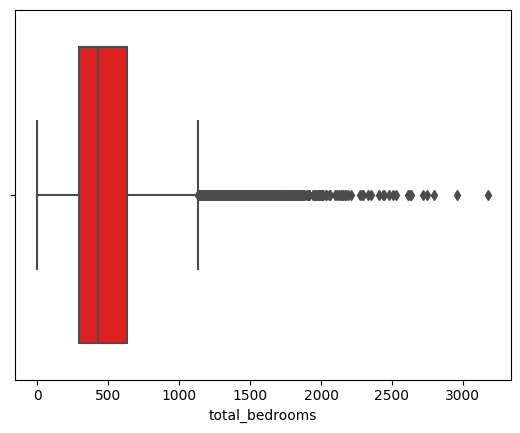

In [39]:
#boxplot for total_bedrooms to detect outliers
sns.boxplot(x='total_bedrooms',data=inlier_data, color='red')

<Axes: xlabel='median_house_value', ylabel='total_bedrooms'>

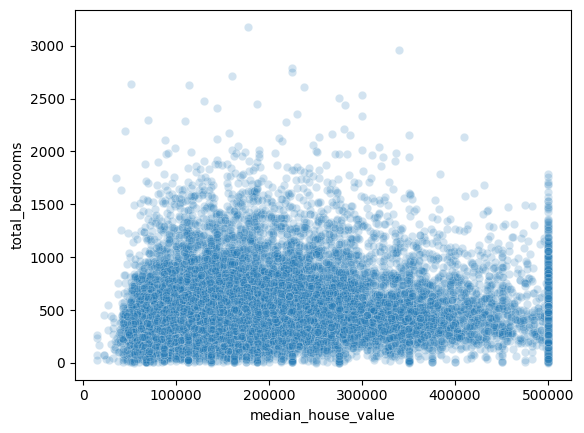

In [40]:
#scatterplot for total_bedrooms with median_house_value to check the outliers with respect to the target(median_house_value)
sns.scatterplot(x='median_house_value',y='total_bedrooms',data=inlier_data,alpha=0.2)

     It can be obsesrved from the above scatterplot that the values higher than 1500 for total_bedrooms are outliers
     

In [41]:
inlier_data=inlier_data[inlier_data['total_bedrooms']<1500]


In [42]:
inlier_data.shape

(19736, 10)

<Axes: xlabel='median_house_value', ylabel='total_bedrooms'>

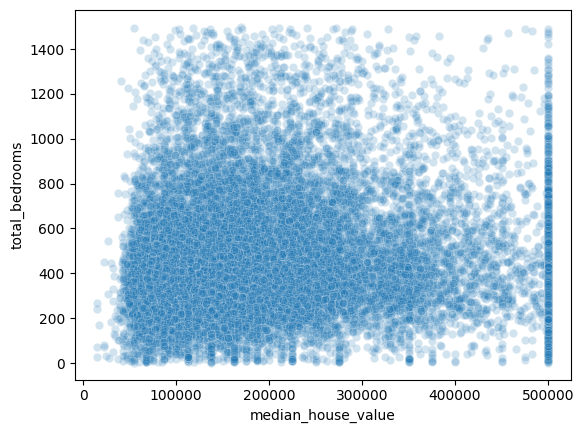

In [45]:
#scatterplot for total_bedrooms with median_house_value to check the outliers with respect to the target(median_house_value)
sns.scatterplot(x='median_house_value',y='total_bedrooms',data=inlier_data,alpha=0.2)

<Axes: ylabel='population'>

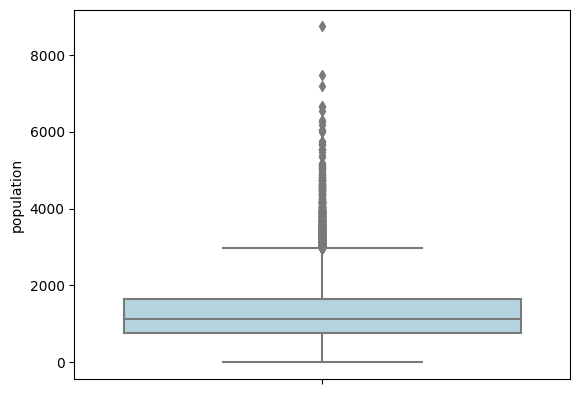

In [47]:
#boxplot for the population to detect the outliers
sns.boxplot(y='population',data=inlier_data,color='lightblue')

<Axes: xlabel='median_house_value', ylabel='population'>

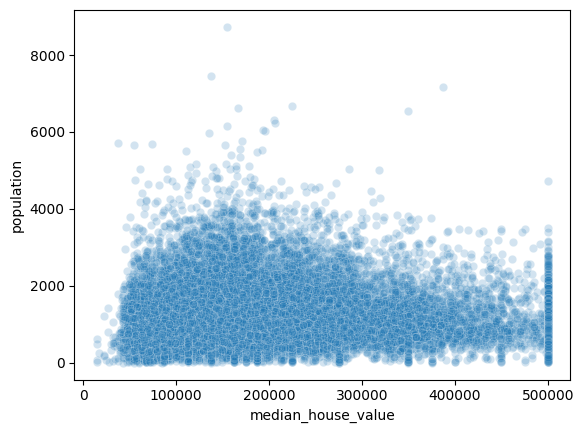

In [48]:
#scatterplot for population with median_house_value to check the outliers with respect to the target(median_house_value)
sns.scatterplot(x='median_house_value',y='population',data=inlier_data,alpha=0.2)


      It can be observed from the above scatterplot that the values higher than 4000 are outliers
      

In [49]:
inlier_data=inlier_data[inlier_data['population']<4000]

<Axes: xlabel='median_house_value', ylabel='population'>

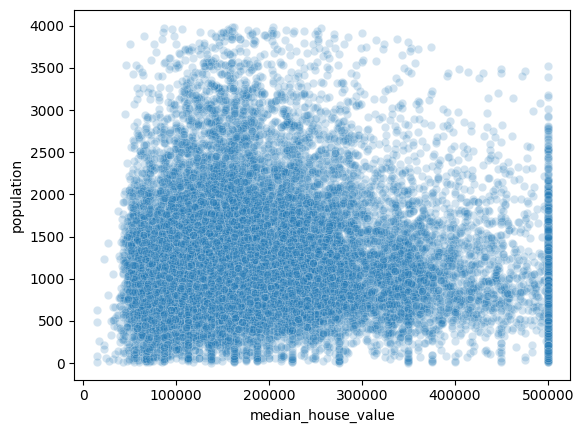

In [50]:
sns.scatterplot(x='median_house_value',y='population',data=inlier_data,alpha=0.2)

In [51]:
inlier_data.shape


(19601, 10)

<Axes: ylabel='households'>

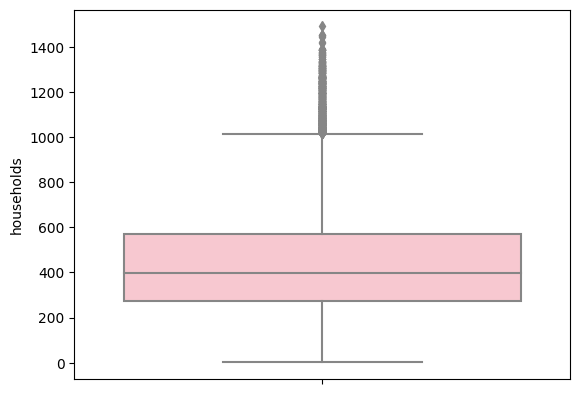

In [52]:
#boxplot for the households to check the outliers
sns.boxplot(y='households',data=inlier_data,color='pink')

<Axes: xlabel='median_house_value', ylabel='households'>

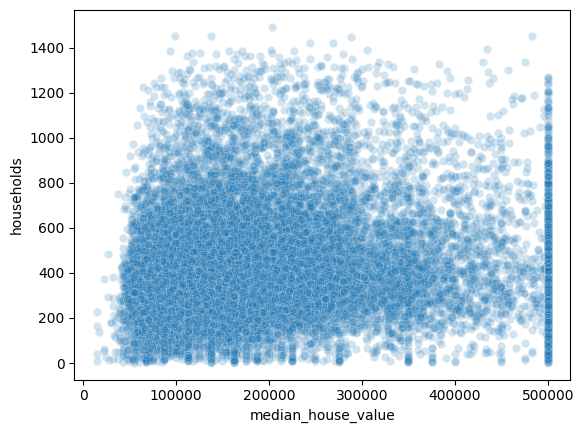

In [53]:
#scatterplot for households with median_house_value to check the outliers with respect to the target(median_house_value)
sns.scatterplot(x='median_house_value', y='households',data=inlier_data,alpha=0.2)

    It is observed from the above scatterplot that the values higher than 1200 are outliers for households

In [54]:
inlier_data=inlier_data[inlier_data['households']<1200]

In [55]:
inlier_data.shape


(19380, 10)

<Axes: xlabel='median_house_value', ylabel='households'>

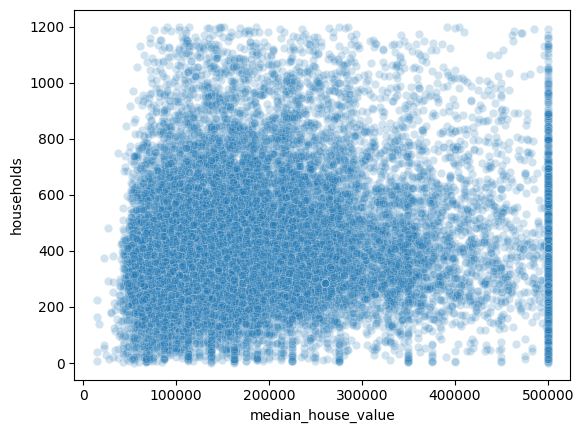

In [56]:
#scatterplot for households with median_house_value to check the outliers with respect to the target(median_house_value)
sns.scatterplot(x='median_house_value',y='households',data=inlier_data,alpha=0.2)

<Axes: ylabel='median_income'>

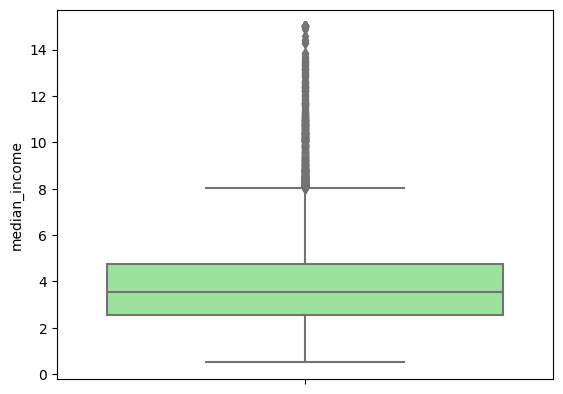

In [58]:
# Boxplot for the median_income to check the outliers
sns.boxplot(y="median_income",data=inlier_data,color="lightgreen")

<Axes: xlabel='median_house_value', ylabel='median_income'>

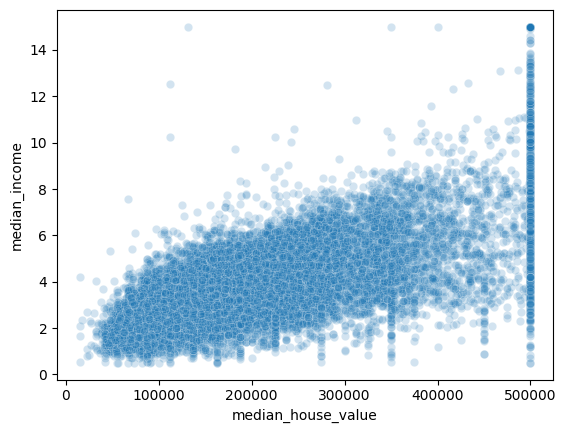

In [59]:
# scatterplot for the median_income with median_house_value to check the outliers with respect to the target (median_house_value)
sns.scatterplot(x='median_house_value',y="median_income",data=inlier_data,alpha=0.2)

      It is observed from the above scatterplot that the values above 9 are outliers for median income

In [60]:
inlier_data=inlier_data[inlier_data['median_income']<9]

<Axes: xlabel='median_house_value', ylabel='median_income'>

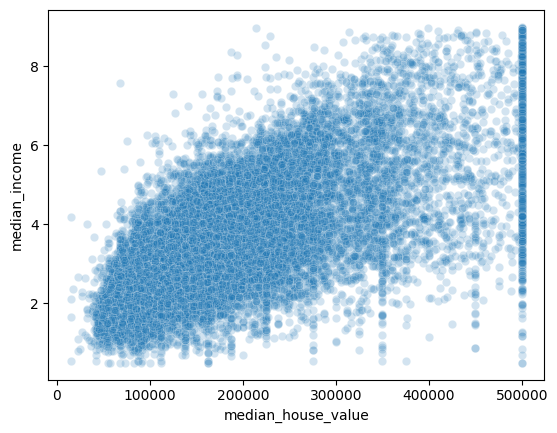

In [61]:
# scatterplot for the median_income with median_house_value to check the outliers with respect to the target (median_house_value)
sns.scatterplot(x='median_house_value',y="median_income",data=inlier_data,alpha=0.2)

In [62]:
inlier_data.shape

(18993, 10)